In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData, select, desc
from datetime import datetime, timedelta

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
metadata = MetaData()
metadata.reflect(bind=engine)

C:\Users\Santiago\AppData\Local\Temp\ipykernel_4544\2564246743.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [12]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session (engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
print("Most recent date:", recent_date)

Most recent date: 2017-08-23


In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
recent_date = datetime.strptime(recent_date, '%Y-%m-%d')
year_before = recent_date - timedelta(days=365)

In [23]:
# Perform a query to retrieve the data and precipitation scores
recent_date_str = recent_date.strftime('%Y-%m-%d')
year_before_str = year_before.strftime('%Y-%m-%d')
data_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_before_str, Measurement.date <= recent_date_str).all()

In [25]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_data_prcp = pd.DataFrame(data_prcp, columns=['date', 'prcp'])
df_data_prcp

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [27]:
# Sort the dataframe by date
df_data_prcp['date'] = pd.to_datetime(df_data_prcp['date'])
df_data_prcp

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


<function matplotlib.pyplot.show(close=None, block=None)>

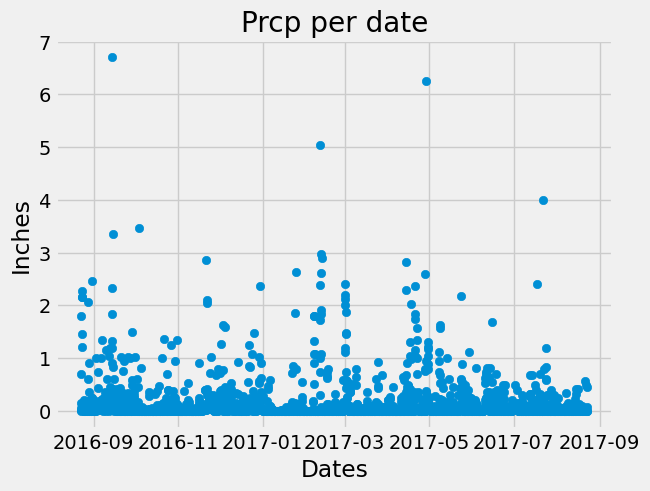

In [29]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.scatter(x=df_data_prcp['date'], y=df_data_prcp['prcp'])
plt.xlabel('Dates')
plt.ylabel('Inches')
plt.title('Prcp per date')
plt.show

In [31]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(df_data_prcp.describe())

                                date         prcp
count                           2230  2021.000000
mean   2017-02-16 05:31:15.874439424     0.177279
min              2016-08-23 00:00:00     0.000000
25%              2016-11-18 00:00:00     0.000000
50%              2017-02-14 12:00:00     0.020000
75%              2017-05-17 00:00:00     0.130000
max              2017-08-23 00:00:00     6.700000
std                              NaN     0.461190


# Exploratory Station Analysis

In [34]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(func.count(Station.id)).scalar()
print("Total number of stations:", station_count)

Total number of stations: 9


In [36]:
#Finding the station with the most rows of tobs
tobs_rows_per_station = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
for station, row_count in tobs_rows_per_station:
    print(f"Station {station}: Number of rows = {row_count}")

Station USC00519281: Number of rows = 2772
Station USC00519397: Number of rows = 2724
Station USC00513117: Number of rows = 2709
Station USC00519523: Number of rows = 2669
Station USC00516128: Number of rows = 2612
Station USC00514830: Number of rows = 2202
Station USC00511918: Number of rows = 1979
Station USC00517948: Number of rows = 1372
Station USC00518838: Number of rows = 511


In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs_data = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
highest_tobs, lowest_tobs, avg_tobs = tobs_data[0]
print(f'Station USC00519281 tobs data:')
print(f'Highest tobs: {highest_tobs}')
print(f'Lowest tobs: {lowest_tobs}')
print(f'Average tobs: {avg_tobs}')

Station USC00519281 tobs data:
Highest tobs: 85.0
Lowest tobs: 54.0
Average tobs: 71.66378066378067


In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data_temp=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= year_before_str,
                                                         Measurement.date <= recent_date_str, Measurement.station == 'USC00519281').all()

In [42]:
#Creating a dataframe
df_data_temp = pd.DataFrame(data_temp, columns=['date', 'tobs'])
df_data_temp

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


In [44]:
#Creating dataframe with recorded frequency of temperature values
temp_count = df_data_temp['tobs'].value_counts()
df_freq_temp = pd.DataFrame({'Value': temp_count.index, 'Count': temp_count.values})
df_freq_temp

,Value,Count
0,74.0,39
1,75.0,33
2,76.0,33
3,77.0,31
4,78.0,22
5,72.0,22
6,70.0,22
7,69.0,19
8,73.0,18
9,79.0,18


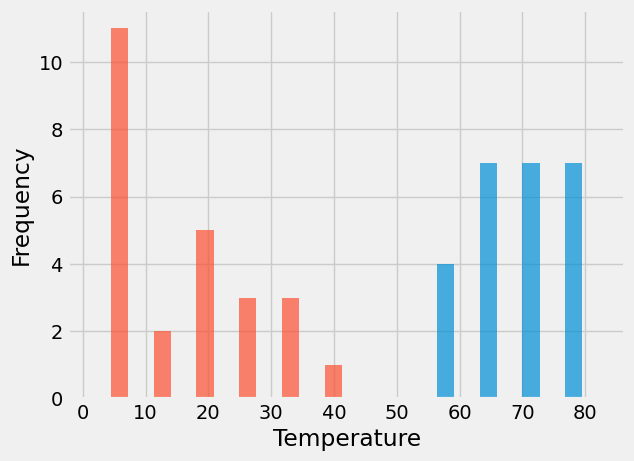

In [46]:
#Ploting the data in a histogram
plt.hist(df_freq_temp, bins=12, alpha=0.7, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [49]:
# Close Session
session.close()